In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import re

In [29]:
ZSun = 0.02
Zetas = [ZSun/x for x in (1, 5, 10, 50, 100, 500)]
# mass_singles [MSun], mass_binaries [MSun], n_singles, n_binaries
cosmic_output = [(9684316.672753084, 20007561.13466783, 17549256, 6913378), (9644736.828012176, 19960332.063149005, 17479847, 6891643), (9699720.348064058, 20034018.174561527, 17588877, 6928611), (9710220.495467905, 20075401.479010012, 17601653, 6935911), (9715008.369425409, 20053329.003643543, 17605025, 6934952), (9761277.614482189, 20127155.02039375, 17682535, 6966924)]

cosmic_initial_pop = {}
for i in range(len(Zetas)):
    cdat = { "mass_singles": cosmic_output[i][0], "mass_binaries": cosmic_output[i][1], "n_singles": cosmic_output[i][2], "n_binaries": cosmic_output[i][3] }
    cosmic_initial_pop[Zetas[i]] = cdat
print(Zetas)
print(cosmic_initial_pop)

hfname = "tsunami_sevn_data.h5"

[0.02, 0.004, 0.002, 0.0004, 0.0002, 4e-05]
{0.02: {'mass_singles': 9684316.672753084, 'mass_binaries': 20007561.13466783, 'n_singles': 17549256, 'n_binaries': 6913378}, 0.004: {'mass_singles': 9644736.828012176, 'mass_binaries': 19960332.063149005, 'n_singles': 17479847, 'n_binaries': 6891643}, 0.002: {'mass_singles': 9699720.348064058, 'mass_binaries': 20034018.174561527, 'n_singles': 17588877, 'n_binaries': 6928611}, 0.0004: {'mass_singles': 9710220.495467905, 'mass_binaries': 20075401.479010012, 'n_singles': 17601653, 'n_binaries': 6935911}, 0.0002: {'mass_singles': 9715008.369425409, 'mass_binaries': 20053329.003643543, 'n_singles': 17605025, 'n_binaries': 6934952}, 4e-05: {'mass_singles': 9761277.614482189, 'mass_binaries': 20127155.02039375, 'n_singles': 17682535, 'n_binaries': 6966924}}


In [30]:
tsunami_keys = []
sevn_keys = []
with h5py.File(hfname, "r") as fh:
    for l in fh: 
        print(l)
        if "tsunami" in l: tsunami_keys.append(l)
        if "sevn" in l: sevn_keys.append(l)
print(tsunami_keys)
print(sevn_keys)

sevn_Z0000040
sevn_Z0000200
sevn_Z0000400
sevn_Z0002000
sevn_Z0004000
sevn_Z0020000
tsunami_Z0000040
tsunami_Z0000200
tsunami_Z0000400
tsunami_Z0002000
tsunami_Z0004000
tsunami_Z0020000
['tsunami_Z0000040', 'tsunami_Z0000200', 'tsunami_Z0000400', 'tsunami_Z0002000', 'tsunami_Z0004000', 'tsunami_Z0020000']
['sevn_Z0000040', 'sevn_Z0000200', 'sevn_Z0000400', 'sevn_Z0002000', 'sevn_Z0004000', 'sevn_Z0020000']


In [31]:
iZ = 3
dat_tsun = pd.read_hdf(hfname, key=tsunami_keys[iZ])
dat_sevn = pd.read_hdf(hfname, key=sevn_keys[iZ])

lZ =  re.match(r"\S+_Z(\S+)", tsunami_keys[iZ]).group(1)
Z = float(f"{lZ[:1]}.{lZ[1:]}")
print("Z = {}".format(Z))
display(dat_tsun)
display(dat_sevn)

Z = 0.002


,a,e,m1,m2,chi1,chi2,theta1,theta2,tgw
0,0.022005,0.451882,13.816645,35.562188,0.000000,0.0,0.955690,0.955690,1.367986e+06
1,0.159797,0.277372,20.783247,37.772603,0.000000,0.0,1.098093,1.098093,3.407437e+09
2,0.020402,0.989390,7.675446,15.507475,0.693229,0.0,0.430321,0.430321,4.114899e+01
3,1.258664,0.571370,17.873723,28.953214,0.000000,0.0,1.275860,1.275860,8.176967e+12
4,3.559830,0.883507,16.374338,17.689117,0.822871,0.0,2.620802,2.620802,2.883563e+13
...,...,...,...,...,...,...,...,...,...
9994,0.097273,0.950915,5.806348,27.666061,0.000000,0.0,2.923679,2.923679,1.831355e+06
9995,0.148576,0.949111,4.820912,5.451360,0.817789,0.0,1.431926,1.431926,2.234385e+08
9996,0.252454,0.610039,3.092080,17.514782,0.775413,0.0,0.122783,0.122783,2.253213e+11
9998,1.107717,0.732188,29.381744,15.232015,0.570319,0.0,1.053304,1.053304,1.657808e+12


,a,e,m1,m2,chi1,chi2,theta1,theta2,tgw
0,105.310423,0.205481,15.194011,7.913506,1.000000,0.0,0.0,0.0,5.685545e+12
1,4332.122070,0.530281,43.289870,22.444347,0.166094,0.0,0.0,0.0,2.553990e+17
2,59.025548,0.013638,21.435794,15.225482,0.561040,0.0,0.0,0.0,1.522758e+11
3,73.208488,0.016405,16.234490,14.244658,1.000000,0.0,0.0,0.0,6.115188e+11
4,36.444138,0.410157,14.590596,6.081058,0.541719,0.0,0.0,0.0,7.448364e+10
...,...,...,...,...,...,...,...,...,...
12628,12.132377,0.673714,5.542059,4.796309,0.594732,0.0,0.0,0.0,1.413496e+09
12629,277.185541,0.118600,16.751724,6.858516,1.000000,0.0,0.0,0.0,3.104642e+14
12630,110.341162,0.016280,14.838191,15.873725,1.000000,0.0,0.0,0.0,3.075017e+12
12631,499.945139,0.013499,22.815854,14.225110,1.000000,0.0,0.0,0.0,7.800269e+14


- a: binary semimajor axis [au]
- e: binary eccentricity
- m1, m2: binary member masses [MSun]
- chi1, chi2: dimensionless spins
- theta1, theta2: spin obliquities
- tgw: gravitational wave coalescence time [yr]

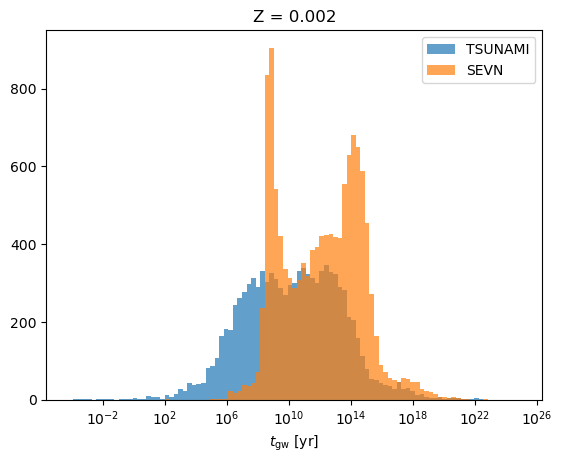

In [34]:
f, ax = plt.subplots()

tgw_tsun = dat_tsun["tgw"]
tgw_sevn = dat_sevn["tgw"]
bins = np.logspace(np.log10(tgw_tsun.min()), np.log10(tgw_tsun.max()), 100)

ax.hist(tgw_tsun, bins=bins, histtype="stepfilled", alpha=0.7, label="TSUNAMI")
ax.hist(tgw_sevn, bins=bins, histtype="stepfilled", alpha=0.7, label="SEVN")
ax.set_xlabel(r"$t_{\rm gw}$ [yr]")
ax.set_xscale("log")
ax.legend()
ax.set_title(f"Z = {Z}")
plt.show()